<a href="https://colab.research.google.com/github/jarodchristiansen/Machine-Learning-Deep-Learning/blob/master/Machine_Learning_Breakdown.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Pre-Processing

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
dataset = pd.read_csv('drive/MyDrive/Machine Learning Round 2/Copy of Data.csv')

In [13]:
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [14]:
# Don't forget to add .values to select the values rather than the frame itself for fitting
X = dataset.iloc[ : , :-1].values
y = dataset.iloc[ : , -1].values

print(X)
print(y)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]
['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


## Take care of missing data (Salary missing for some customers)

Using sklearn to fit the missing field as an average of the column it resides in. For this method the data has to be numerical

*SimpleImputer* documentation provided here:
https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

**described as:**
> Replace missing values using a descriptive statistic (e.g. mean, median, or most frequent) along each column, or using a constant value.



In [15]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

imputer.fit(X[ : , 1:3])
X[:, 1:3] = imputer.transform(X[ : , 1:3])

In [16]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


## Encoding Categorical Data

Using one-hot encoding for categorical data to prevent it being mis-represented as a feature. ([1, 0, 0], or [0, 1, 0] rather than 0 , 1, 2 to prevent the model from misinterpreting them as order schema)

This will be used on the Country filed in this case

### Encoding Independent Variable

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [18]:
print(X)
print(y)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]
['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


### Encoding Dependent Variable
Using LabelEncoder for yes/no as this is binary and doesn't introduce the issue of 'order'

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [20]:
print(y)

[0 1 0 0 1 1 0 1 0 1]


## Splitting dataset Training/Test - Feature Scaling must come after splitting

information leakage occurs if feature scaling is applied before splitting the dataset, therefore to get a more accurate result scaling comes after

data leakage: https://machinelearningmastery.com/data-leakage-machine-learning/


> Data leakage is when information from outside the training dataset is used to create the model. This additional information can allow the model to learn or know something that it otherwise would not know and in turn invalidate the estimated performance of the mode being constructed.



In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [22]:
print(X_train)

[[0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 35.0 58000.0]]


In [23]:
print(X_test)

[[0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


In [24]:
print(y_train)

[0 1 0 0 1 1 0 1]


In [25]:
print(y_test)

[0 1]


## Feature Scaling
Standardization vs. Normalization

X - mean(x) / Std(x)  vs X - min(x) / max(x) - min(x)

- Don't apply scaling to OneHotEncoded columns as this loses the value they provide with encoding


Documentation on Standardization vs Normalization:

https://www.shiksha.com/online-courses/articles/normalization-and-standardization/#:~:text=is%20normally%20distributed.%22-,Key%20Difference%20Between%20Normalization%20and%20Standardization,1%20or%20%2D1%2D1.



> Normalization and standardization are two techniques used to transform data into a common scale. Normalization is a technique used to scale numerical data in the range of 0 to 1. This technique is useful when the distribution of the data is not known or when the data is not normally distributed. On the other hand, standardization is a technique used to transform data into a standard normal distribution. This technique is useful when the distribution of the data is known and when the data is normally distributed. Both techniques have different applications, and choosing the right technique based on the data and the problem you're trying to solve is important.



In [26]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
X_test[:, 3:] = sc.transform(X_test[:, 3:])

In [27]:
print(X_train)

[[0.0 0.0 1.0 -0.19159184384578545 -1.0781259408412425]
 [0.0 1.0 0.0 -0.014117293757057777 -0.07013167641635372]
 [1.0 0.0 0.0 0.566708506533324 0.633562432710455]
 [0.0 0.0 1.0 -0.30453019390224867 -0.30786617274297867]
 [0.0 0.0 1.0 -1.9018011447007988 -1.420463615551582]
 [1.0 0.0 0.0 1.1475343068237058 1.232653363453549]
 [0.0 1.0 0.0 1.4379472069688968 1.5749910381638885]
 [1.0 0.0 0.0 -0.7401495441200351 -0.5646194287757332]]


In [28]:
print(X_test)

[[0.0 1.0 0.0 -1.4661817944830124 -0.9069571034860727]
 [1.0 0.0 0.0 -0.44973664397484414 0.2056403393225306]]


# Regressions


## Simple Linear Regression

The ultimate guide to linear regression: https://www.graphpad.com/guides/the-ultimate-guide-to-linear-regression

In its simplest form, regression is a type of model that uses one or more variables to estimate the actual values of another. There are plenty of different kinds of regression models, including the most commonly used linear regression, but they all have the basics in common.

Usually the researcher has a response variable they are interested in predicting, and an idea of one or more predictor variables that could help in making an educated guess. Some simple examples include:

Predicting the progression of a disease such as diabetes using predictors such as age, cholesterol, etc. (linear regression)
Predicting survival rates or time-to-failure based on explanatory variables (survival analysis)
Predicting political affiliation based on a person’s income level and years of education (logistic regression or some other classifier)
Predicting drug inhibition concentration at various dosages (nonlinear regression)
There are all sorts of applications, but the point is this: If we have a dataset of observations that links those variables together for each item in the dataset, we can regress the response on the predictors.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
dataset = pd.read_csv('drive/MyDrive/Machine Learning Round 2/Copy of Salary_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [32]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [33]:
y_pred = regressor.predict(X_test)

Visualize Data From TRAINING set

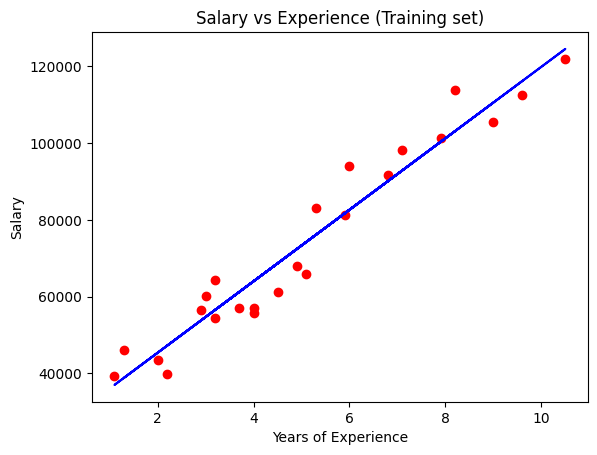

In [34]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

Visualize Data from TEST set

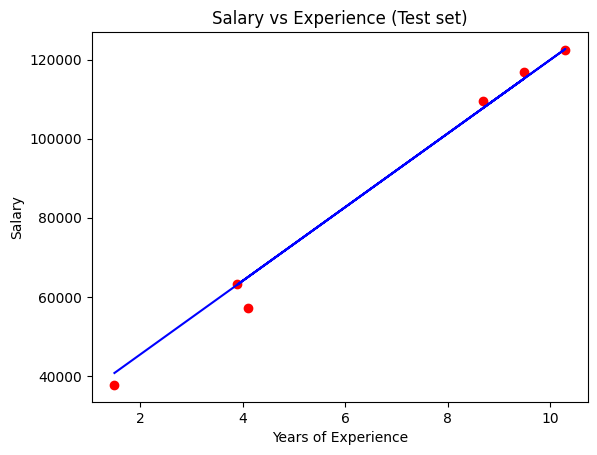

In [ ]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, y_pred, color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

### Making a single prediction (for example the salary of an employee with 12 years of experience) & Linear Regression

In [ ]:
print(regressor.predict([[12]]))

[138531.00067138]


Therefore, our model predicts that the salary of an employee with 12 years of experience is $ 138531.0007.

**Important note:** Notice that the value of the feature (12 years) was input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting 12 into a double pair of square brackets makes the input exactly a 2D array. Simply put:

$12 \rightarrow \textrm{scalar}$

$[12] \rightarrow \textrm{1D array}$

$[[12]] \rightarrow \textrm{2D array}$

In [ ]:
print(regressor.coef_)
print(regressor.intercept_)

[9312.57512673]
26780.09915062818


Therefore, the equation of our simple linear regression model is:

$$\textrm{Salary} = 9312.58 \times \textrm{YearsExperience} + 26780.10$$

**Important Note:** To get these coefficients we called the "coef_" and "intercept_" attributes from our regressor object. Attributes in Python are different than methods and usually return a simple value or an array of values.

## Multiple Linear Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('drive/MyDrive/Machine Learning Round 2/Copy of 50_Startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
print(X)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
print(X_train)

[[0.0 1.0 0.0 55493.95 103057.49 214634.81]
 [0.0 0.0 1.0 46014.02 85047.44 205517.64]
 [0.0 1.0 0.0 75328.87 144135.98 134050.07]
 [1.0 0.0 0.0 46426.07 157693.92 210797.67]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 1000.23 124153.04 1903.93]
 [0.0 0.0 1.0 542.05 51743.15 0.0]
 [0.0 0.0 1.0 65605.48 153032.06 107138.38]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [0.0 1.0 0.0 61994.48 115641.28 91131.24]
 [1.0 0.0 0.0 63408.86 129219.61 46085.25]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [1.0 0.0 0.0 23640.93 96189.63 148001.11]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 15505.73 127382.3 35534.17]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [1.0 0.0 0.0 64664.71 139553.16 137962.62]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [1.0 0.0 0.0 28754.33 118546.05 172795.67]
 [1.

### Feature Scaling is not needed in multiple linear regression as the multiple coefficients account for this


In [ ]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


### Using the multi regression model to make specific predictions/find the regression equation

Making a single prediction (for example the profit of a startup with R&D Spend = 160000, Administration Spend = 130000, Marketing Spend = 300000 and State = 'California')

In [ ]:
print(regressor.predict([[1.0, 0.0, 0.0, 160000, 130000, 300000]]))

[181566.92]


Therefore, our model predicts that the profit of a Californian startup which spent 160000 in R&D, 130000 in Administration and 300000 in Marketing is $ 181566,92.

**Important note 1:** Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array. Simply put:

$1, 0, 0, 160000, 130000, 300000 \rightarrow \textrm{scalars}$

$[1, 0, 0, 160000, 130000, 300000] \rightarrow \textrm{1D array}$

$[[1, 0, 0, 160000, 130000, 300000]] \rightarrow \textrm{2D array}$

**Important note 2:** Notice also that the "California" state was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the second row of the matrix of features X, "California" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, not the last three ones, because the dummy variables are always created in the first columns.

### Getting the final linear regression equation with the values of the coefficients (Multiple Linear Regression)

In [ ]:
print(regressor.coef_)
print(regressor.intercept_)

[ 8.66e+01 -8.73e+02  7.86e+02  7.73e-01  3.29e-02  3.66e-02]
42467.52924853278


Therefore, the equation of our multiple linear regression model is:

$$\textrm{Profit} = 86.6 \times \textrm{Dummy State 1} - 873 \times \textrm{Dummy State 2} + 786 \times \textrm{Dummy State 3} + 0.773 \times \textrm{R&D Spend} + 0.0329 \times \textrm{Administration} + 0.0366 \times \textrm{Marketing Spend} + 42467.53$$

**Important Note:** To get these coefficients we called the "coef_" and "intercept_" attributes from our regressor object. Attributes in Python are different than methods and usually return a simple value or an array of values.

## Polynomial Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('drive/MyDrive/Machine Learning Round 2/Copy of Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [ ]:
print(X)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


### Standard Linear Regression Model


In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

### Train Polynomial Regression Model


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)

lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

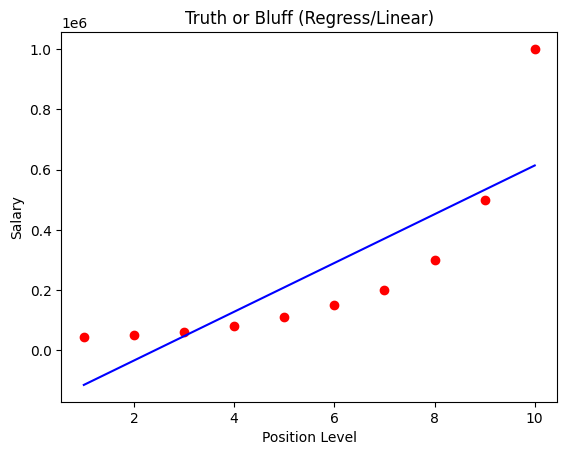

In [ ]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color ='blue')
plt.title('Truth or Bluff (Regress/Linear)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

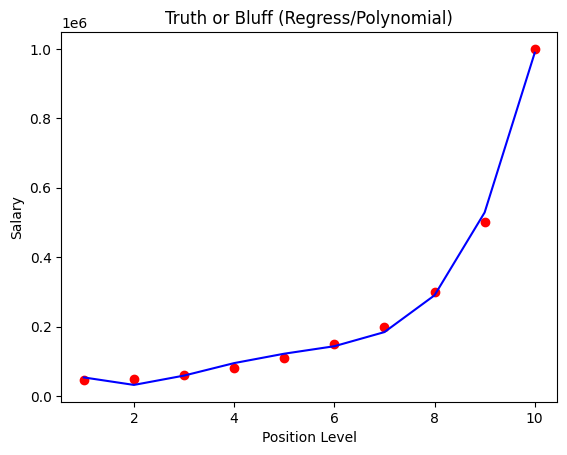

In [ ]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color ='blue')
plt.title('Truth or Bluff (Regress/Polynomial)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

### Predict a new result with Linear Regression

In [ ]:
lin_reg.predict([[6.5]])

array([330378.79])

Predict a new result with Polynomial Regression Model

In [ ]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45])

## Support Vector Regression Model
Accounts for an "Epsilon Interferance band" of confidence beyond traditional linear regression. Requires feature scaling

In [ ]:
dataset = pd.read_csv('drive/MyDrive/Machine Learning Round 2/Copy of Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

### Feature Scaling


In [ ]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [ ]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [ ]:
y = y.reshape(len(y), 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [ ]:
print(X)

[[-1.57]
 [-1.22]
 [-0.87]
 [-0.52]
 [-0.17]
 [ 0.17]
 [ 0.52]
 [ 0.87]
 [ 1.22]
 [ 1.57]]


In [ ]:
print(y)

[[-0.72]
 [-0.7 ]
 [-0.67]
 [-0.6 ]
 [-0.49]
 [-0.35]
 [-0.17]
 [ 0.18]
 [ 0.88]
 [ 2.64]]


### Train SVR model

In [ ]:
from sklearn.svm import SVR

regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

### Predict a new result

In [ ]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1, 1))

array([[170370.02]])

### Visualize the Results


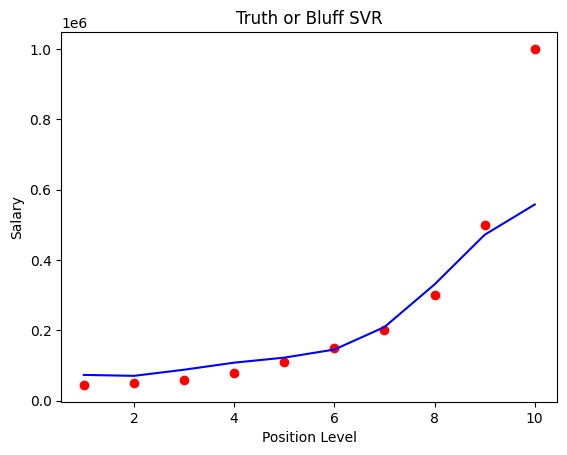

In [ ]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1, 1)), color ='blue')
plt.title('Truth or Bluff SVR')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Descision Tree Regression (Doesn't Require Feature Scaling)

In [ ]:
dataset = pd.read_csv('drive/MyDrive/Machine Learning Round 2/Copy of Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

### Train the Decision Tree Regression Model

In [ ]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

### Predict a new result

In [ ]:
regressor.predict([[6.5]])

array([150000.])

### Visualizing results from Decision Tree Regression Model

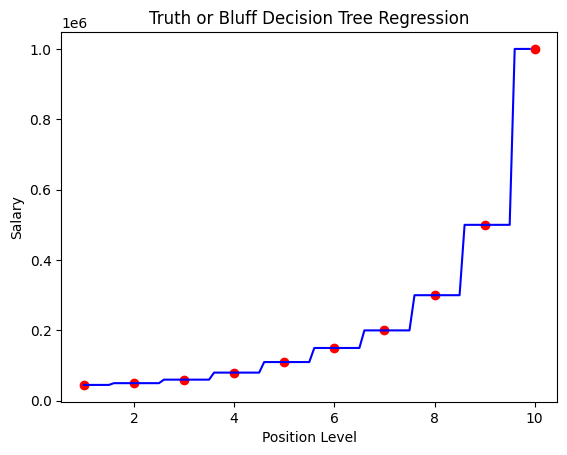

In [ ]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color ='blue')
plt.title('Truth or Bluff Decision Tree Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Random Forest Regression

Ensemble Learning - In statistics and machine learning, ensemble methods use multiple learning algorithms to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone.[1][2][3] Unlike a statistical ensemble in statistical mechanics, which is usually infinite, a machine learning ensemble consists of only a concrete finite set of alternative models, but typically allows for much more flexible structure to exist among those alternatives.

Step 1: Pick random K data Points

Step 2: Build the Decision Tree associated to these K data points

Step 3: Choose the number Ntree of tress you want to build and repeat Steps 1 & 2

Step 4:
For the new data point, make each of your Ntree trees predict the value of Y for the data pointin question, and assignt he new data point the average across all of the predicted Y values.

In [ ]:
dataset = pd.read_csv('drive/MyDrive/Machine Learning Round 2/Copy of Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)

RandomForestRegressor(n_estimators=10, random_state=0)

In [ ]:
regressor.predict([[6.5]])

array([167000.])

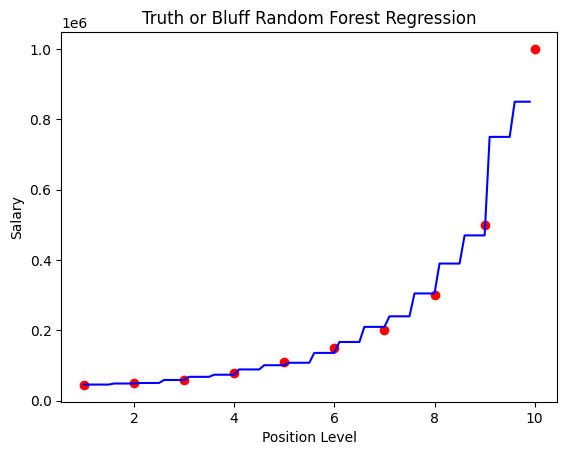

In [ ]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color ='blue')
plt.title('Truth or Bluff Random Forest Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Analyzing Regression Models

R-squared is a statistical measure that indicates how much of the variation of a dependent variable is explained by an independent variable in a regression model. In other words, on average how close the model is to a perfect match of the trendline based on distance.

 - 1.0 - Overfitting?
 - 0.9 - Solid
 - '> 0.65' - Good/Okay
 - '< 0.65' - Questionable
 - 0 - No representation of the data

 R-squared = goodness of fit (The greater the better unless overfitting)

In [ ]:
dataset = pd.read_csv('drive/MyDrive/Machine Learning Round 2/AnalyzingModelsData.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

print(X)
print(y)

[[  41.76 1024.07   73.17]
 [  62.96 1020.04   59.08]
 [  39.4  1012.16   92.14]
 ...
 [  74.33 1012.92   36.48]
 [  69.45 1013.86   62.39]
 [  62.52 1017.23   67.87]]
[463.26 444.37 488.56 ... 429.57 435.74 453.28]


In [ ]:
dataset

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


#### Train Test *Split*

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### Multiple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


In [ ]:
from sklearn.metrics import r2_score
linear_regression_r = r2_score(y_test, y_pred)
print(linear_regression_r)

0.9347068473282546


#### Polynomial Regression

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[431.06 431.23]
 [463.38 460.01]
 [470.46 461.14]
 ...
 [470.29 473.26]
 [443.2  438.  ]
 [466.89 463.28]]


In [ ]:
poly_reg_r = r2_score(y_test, y_pred)
print(poly_reg_r)

0.8418720571484963


#### Support Vector Regression


In [ ]:
y = y.reshape(len(y),1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

##### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

##### Training the SVR Model on Dataset

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)).reshape(-1,1))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[432.98 431.23]
 [460.91 460.01]
 [468.67 461.14]
 ...
 [468.91 473.26]
 [442.3  438.  ]
 [464.64 463.28]]


##### Testing R Squared

In [ ]:
svr_r = r2_score(y_test, y_pred)
print(svr_r)

0.8494246102002504


#### Decision Tree Regression

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

##### Training the model

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

##### Predicting the results

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[431.28 431.23]
 [459.59 460.01]
 [460.06 461.14]
 ...
 [471.46 473.26]
 [437.76 438.  ]
 [462.74 463.28]]


In [ ]:
decision_tree_r = r2_score(y_test, y_pred)
print(decision_tree_r)

0.922905874177941


#### Random Forest Regression

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

##### Train the Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

##### Predict the results

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[434.05 431.23]
 [458.79 460.01]
 [463.02 461.14]
 ...
 [469.48 473.26]
 [439.57 438.  ]
 [460.38 463.28]]


In [ ]:
random_forest_r = r2_score(y_test, y_pred)
print(random_forest_r)

0.9615908334363876


### Analyzing the results of all models

In [ ]:
models = ['Linear Regression', 'Polynomial Regression', 'SVR', 'Decision Tree', 'Random Forest Regression']
scores = [linear_regression_r, poly_reg_r, svr_r, decision_tree_r, random_forest_r]

res = "\n".join("{} {}".format(x, y) for x, y in zip(models, scores))
print(res)

Linear Regression 0.9347068473282546
Polynomial Regression 0.8418720571484963
SVR 0.8494246102002504
Decision Tree 0.922905874177941
Random Forest Regression 0.9615908334363876
